<a href="https://colab.research.google.com/github/Kawin101/935442-ImageProcessing/blob/main/Lab09_(28_2_2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Image Recognition: Artificial Intelligence
from tensorflow.keras.datasets import mnist # number of 0 to 9
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()
# X_train = np.array(X_train, 'int16')
plt.imshow(X_train[1000], cmap='gray')
plt.show()
print(X_train.shape)
"""
digit 0-9 
0 = 6000
1 = 6000
...
9 = 6000
"""
print(X_test.shape)


X_train[6] mathch X_train[8]


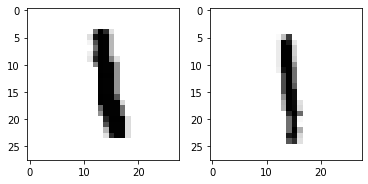

In [ ]:
# For check image pixel A and B 
from numpy.lib.type_check import imag 
import cv2

img1 = X_train[6]/255 # digit 1
img2 = X_train[7]/255 # digit 3
img3 = X_train[8]/255 # digit 1

img1 = img1.astype('uint8')
img2 = img2.astype('uint8')
img3 = img3.astype('uint8')

result1 = cv2.matchTemplate(img1, img2, cv2.TM_CCOEFF_NORMED)
result2 = cv2.matchTemplate(img1, img3, cv2.TM_CCOEFF_NORMED)


if result1>result2:
 print("X_train[6] mathch X_train[7]")
 plt.subplot(121), plt.imshow(X_train[6], cmap="binary")
 plt.subplot(122), plt.imshow(X_train[7], cmap="binary")
 plt.show()
else:
 print("X_train[6] mathch X_train[8]")
 plt.subplot(121), plt.imshow(X_train[6], cmap="binary")
 plt.subplot(122), plt.imshow(X_train[8], cmap="binary")
 plt.show()

def XmoreY(result1, result2):
  result1 > result2



In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.neural_network import MLPClassifier

(X_train, y_train),(X_test, y_test) = mnist.load_data()
hog_list = []
for feature in X_train:
  fd = hog(feature.reshape((28,28)), orientations=9,
           pixels_per_cell=(14,14), cells_per_block=(1,1))
  hog_list.append(fd)

X_train_hog = np.array(hog_list, 'float64') # digit 0-9 (60000)

model = MLPClassifier(activation='relu', hidden_layer_sizes=(200,200), alpha=0.3)
model.fit(X_train_hog, y_train)


11490434/11490434 [==============================] - 0s 0us/step


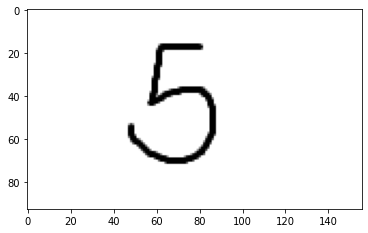

0


In [ ]:
img = cv2.imread('5.png', 0)
ret, binary = cv2.threshold(img,100,255,cv2.THRESH_BINARY_INV)
binary = cv2.resize(binary,(28,28),interpolation=cv2.INTER_AREA)
binary_hog = hog(binary, orientations=9, pixels_per_cell=(14,14), cells_per_block=(1,1))
predict = model.predict([binary_hog])
plt.imshow(img,cmap='gray')
plt.show()
print(predict[0])